In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers.core import Dense,Activation,Dropout
from keras.utils import np_utils

import matplotlib.pyplot as plt
import matplotlib.image as processimage

In [7]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [11]:
#准备数据
#reshape
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)
#to float
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
#归一化
x_train = x_train/255.0

In [12]:
#prepare basic setups
batch_size = 1024 #一次训练给神经网络注入多少数据
nb_class = 10 #多少个类别
nb_epochs = 4 #训练次数

In [13]:
#class vectors [0,0,0,0,0,0,0,1,0,0](7)
y_test = np_utils.to_categorical(y_test,nb_class) #label
y_train = np_utils.to_categorical(y_train,nb_class)
print(y_test.shape)

(10000, 10)


In [17]:
#设置网络结构
model = Sequential()
#1st layer
model.add(Dense(512, #这里写的参数是输出的
                input_shape = (28*28,))) #这里才是输入的(需要加逗号 实际上是（28*28,1）)，也可以写成input_dim = 28*28(这个不用加逗号)
model.add(Activation("relu"))
model.add(Dropout(0.2)) #从现有网络中拿掉一部分数据 解决过拟合(overfit)问题 防止步伐过大

#2nd layer
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2)) #从现有网络中拿掉一部分数据 解决过拟合(overfit)问题 防止步伐过大

#3rd layer
model.add(Dense(10)) #最终分类
model.add(Activation("softmax"))

In [22]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",#adam,SGD
             metrics = ["accuracy"])

In [23]:
#启动网络训练
Training = model.fit(x_train,y_train,batch_size = batch_size,epochs = nb_epochs,validation_data = (x_test,y_test))

Epoch 1/4
59/59 [==============================] - 3s 42ms/step - loss: 0.1226 - accuracy: 0.9628 - val_loss: 15.8006 - val_accuracy: 0.9689
Epoch 2/4
59/59 [==============================] - 2s 40ms/step - loss: 0.0733 - accuracy: 0.9772 - val_loss: 11.7247 - val_accuracy: 0.9760
Epoch 3/4
59/59 [==============================] - 2s 40ms/step - loss: 0.0563 - accuracy: 0.9833 - val_loss: 11.3968 - val_accuracy: 0.9789
Epoch 4/4
59/59 [==============================] - 2s 40ms/step - loss: 0.0493 - accuracy: 0.9842 - val_loss: 12.1315 - val_accuracy: 0.9785


In [26]:
Training.params

{'verbose': 1, 'epochs': 4, 'steps': 59}

label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


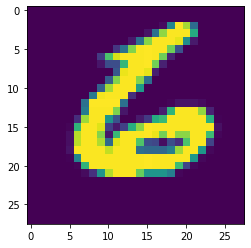

In [34]:
#拉取test里的图
testrun = x_test[9999].reshape(1,784)
testlabel = y_test[9999]
print("label:",testlabel)
plt.imshow(testrun.reshape([28,28]))

In [38]:
#判定输出结果
pred = model.predict(testrun)
print(pred)
print("x_test[9999]预测结果:",[final.argmax() for final in pred]) #final寻找最大元素的下标
# print([final.argmax() for final in pred])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
x_test[9999]预测结果: [6]


In [39]:
#用自己的图测试一下
target_img = processimage.imread("./test0")
print("reshpe之前:",target_img.shape)
plt.imshow(target_img)
target_img = target_img.reshape(1,784)
print("reshpe之后:",target_img.shape)
target_img = np.array(target_img)
target_img = target_img.astype("float32")
target_img = target_img/255.0
print target_img

mypred = model.predict(target_img)
print mypred
print([myfinal.argmax() for myfinal in mypred])

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(target_img)? (<ipython-input-39-ee426550b067>, line 10)